In [22]:
#Things to do:
#    -Make charts nicer
#    -Standardise the date axes
#    -Use bar charts for short term charts
#    -Standardise the date axes
#    -Use bar charts for short term charts
#    -Change the chart fonts

In [23]:
#Necessary packages
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import calendar

from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

matplotlib.rcParams.update({'font.size': 22})

In [24]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# RBA Financial Aggregates - Key Graphs

In [25]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
current_date = now.strftime("%d-%m-%Y")
current_date_and_time = now.strftime("%H:%M:%S %d-%m-%Y")
#print("Graphs updated at " + current_time + " on " + current_date)
print("Graphs and data updated at " + current_time + " on " + current_date)

Graphs and data updated at 22:11:43 on 10-05-2024


In [26]:
# The location
url = 'https://www.rba.gov.au/statistics/tables/xls/d01hist.xlsx'

In [27]:
# Get the file
resp = requests.get(url)

In [28]:
# Open a new file to save down as
output = open('d01.xls', 'wb')
output.write(resp.content)
output.close()

In [29]:
df = pd.read_excel('d01.xls');

In [30]:
# Name the columns after the first row
df.columns = df.iloc[0];
#df.head(3) #Look at the first 15 rows of the data frame

In [31]:
df = df[10:] #Remove the rows of metadata
df.columns = df.columns.str.replace('Title', 'Date') #Rename the date column
#df.head(3)

In [32]:
last_data = df["Date"].iloc[-1]
print("Most recent data is for "+ calendar.month_name[last_data.month] 
      + " " + str(last_data.year))

Most recent data is for March 2024


In [33]:
def graph_series(seriesName, data, startDate, endDate, lastPointOption):
    
    #Get the data
    values = data[seriesName]
    dates = data["Date"]
    
    #Filter to the desired date range
    mask = (data.loc[:,'Date'] >= startDate) & (data.loc[:,'Date'] <= endDate)
    dataToGraph = values.loc[mask]
    datesToGraph = dates.loc[mask]
    
    #print(dataToGraph)
    #print(datesToGraph)
    
    #print(datesToGraph.iloc[-1])
    
    #Only use years as labels on the horizontal axis
    yearsToGraph = [date for date in datesToGraph if date.month == 1]
    
    ###If last datapoint is December, add an extra year to this. 
        
    lastDate = yearsToGraph[-1]
    
    if lastDate.month == 12:
        nextYear = lastDate.year + 1
        aYearLater = lastDate.replace(year = nextYear, month=12, day=31)
        yearsToGraph.append(aYearLater)
        
    #print("Years to graph is :")
    #print(yearsToGraph)
    
        #Just hashed out for a test
    plt.rcParams.update({'font.size': 14})
    font = {'size'   : 14}
    matplotlib.rc('font', **font)
    
    # Create a figure containing a single axes.
    fig, ax = plt.subplots()
    
    fig.set_size_inches(7, 5, forward=True)
    

    
    #plt.rcParams.update({'font.size': 22})
    
    #If more than 10 years, cuts the labelling and ticks down to every second year
    if len(yearsToGraph) > 12:
        yearsToGraph = [date for date in datesToGraph if date.month == 1 
                        and (date.year % 2 == 0)]
    
    #print("Years to graph is (altered possibly for 10+ years) :") 
    #print(yearsToGraph)
    
    # X-ticks set as calculated above
    ax.set_xticks(yearsToGraph)
    
    #print(yearsToGraph)
    
    #Extract year labels
    yearsOnly = [date.year for date in yearsToGraph if date.month == 1 ]
    
    # Make the figure
    ax.plot(datesToGraph, dataToGraph, 'b', linewidth= '3')
    
    ax.axhline(y=0.0, color='black', linestyle='-', linewidth= '1')
    
    # Get the last data point for highlighting 
    lastData = dataToGraph.values[-1]
    lastDate = datesToGraph.values[-1]
    
    # All graphs named by series plus per cent in subtitle (could be better)
    ax.set_title(seriesName + "\n" + "Per cent")
    
    # X-axis labels are whole years only 
    #print(yearsOnly)
    ax.set_xticklabels(yearsOnly)
    

                     #bottom=True, top=False, left=False, right=False)
    
    #If december data, add at extra year to x-axis
    if endDate.month == 12:
            nextYear = endDate.year + 1
            last_day_of_last_year = endDate.replace(year = nextYear, month=12, day=31)
            first_day_of_last_year = endDate.replace(year = nextYear, month=1, day=31)
            
            #Add an extra year to tick labels
            
            yearsOnly.append(nextYear)
            yearsToGraph.append(first_day_of_last_year)
            #print('This is years only')
            #print(yearsOnly)
            #print('This is years to graph')
            #print(yearsToGraph)
            ax.set_xticks(yearsToGraph)
            ax.set_xticklabels(yearsOnly)
            

    
    
    #Make the chart start show whole years only
    last_day_of_last_year = endDate.replace(month=12, day=31)
    first_day_of_last_year = endDate.replace(month=1, day=31)
    first_day_of_first_year = startDate.replace(month=1, day=1)
    

    #print("Years to graph is (altered possibly for December data) :") 
    #print(yearsToGraph)        

    
    ax.set_xlim([first_day_of_first_year, last_day_of_last_year])
    
    
    #Fonts
    
    #horizAxisStart = ax.get_xlim()[0]
    #print(horizAxisStart)
    #horizAxisEnd = ax.get_xlim()[1]
    #print(horizAxisEnd)
    #horizAxisLength = horizAxisEnd - horizAxisStart
    #print()
    
    #vertAxisStart = ax.get_ylim()[0]
    #print(vertAxisStart)
    #vertAxisEnd = ax.get_ylim()[1]
    #print(vertAxisEnd)
    #vertAxisLength = vertAxisEnd - vertAxisStart
    
    ax.tick_params(left = True, right = True, labelleft=True, labelright=True)
    
    if lastPointOption:
        
        ax.plot(lastDate, lastData, 'r.', markersize= '10')
        
        lastDateMonth = calendar.month_name[lastDate.month] 
    
        #Add some metadata for the last datapoint
        textstr = "Latest data point is " + str(round(lastData,2)) \
        + " per cent for  \n" + calendar.month_name[lastDate.month] + " " + str(lastDate.year)
        props = dict(boxstyle='round', facecolor='none', alpha=0.5, edgecolor='none')
        ax.text(.01,.17, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='left', bbox=props, color = 'red')

    filename = seriesName + str(startDate) + str(endDate) + ".jpg"
    #print(filename)
    plt.savefig(filename)

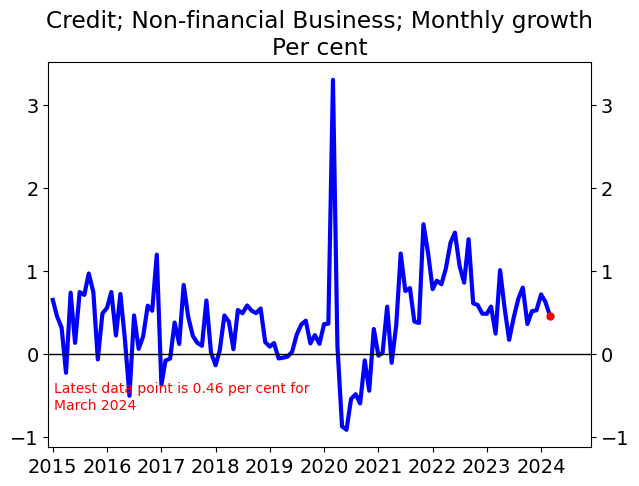

In [34]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Non-financial Business; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

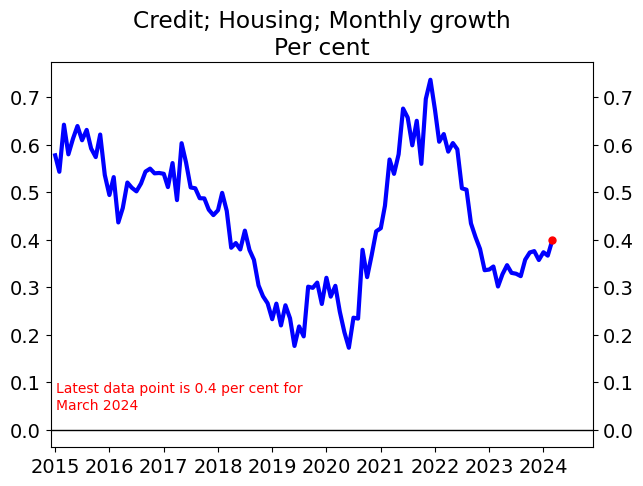

In [35]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Housing; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample, 1)





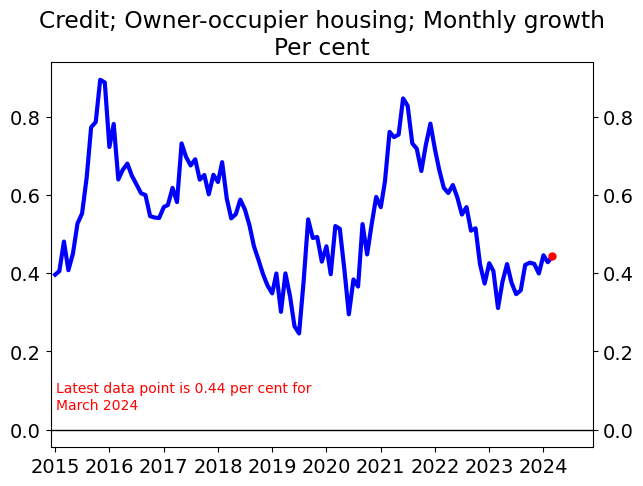

In [36]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Owner-occupier housing; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

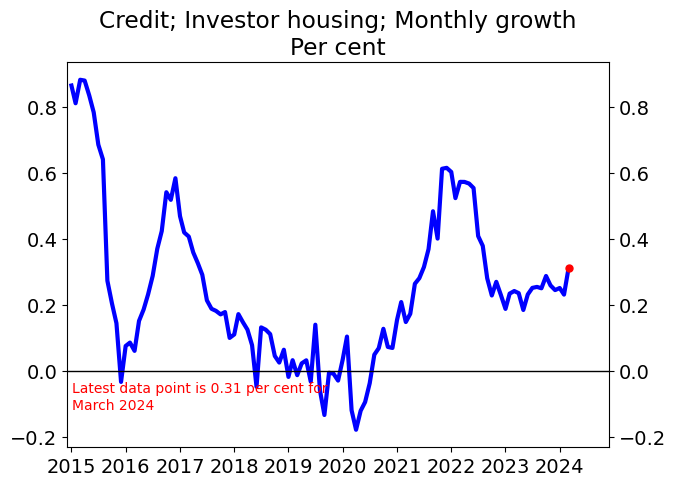

In [37]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Investor housing; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

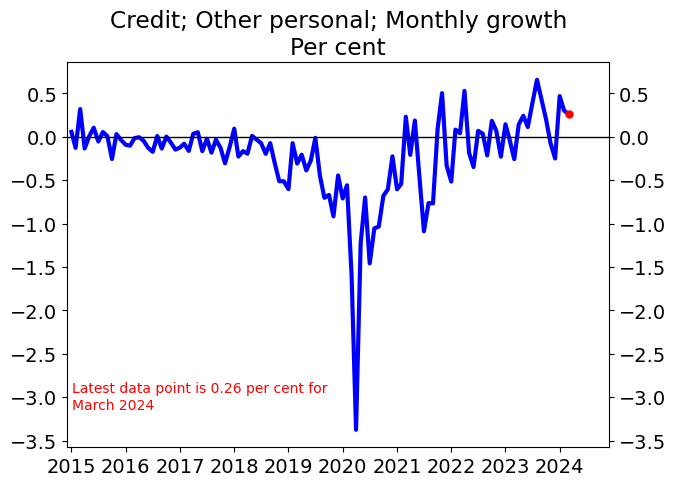

In [38]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Other personal; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

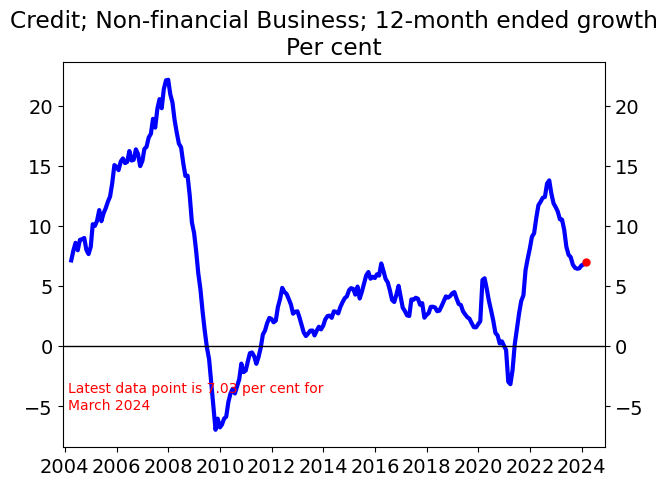

In [39]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Non-financial Business; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

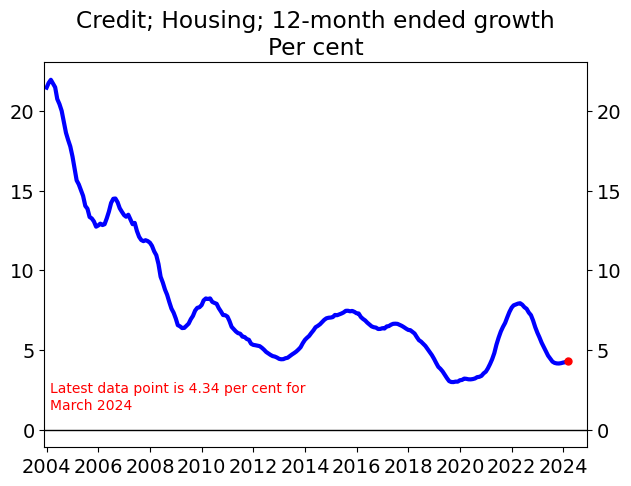

In [40]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Housing; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

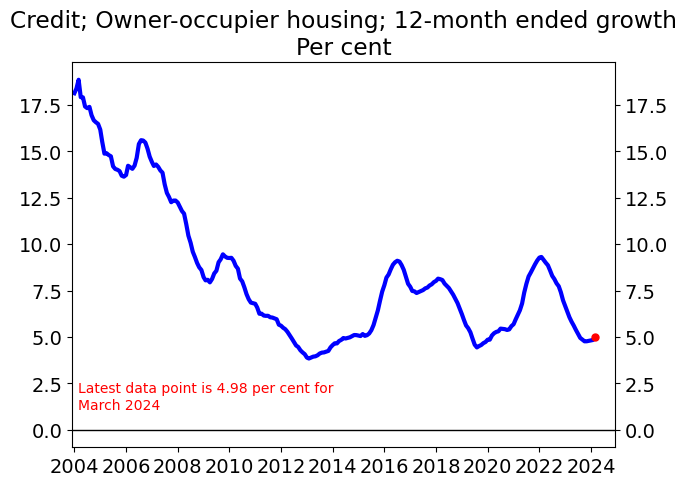

In [41]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Owner-occupier housing; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

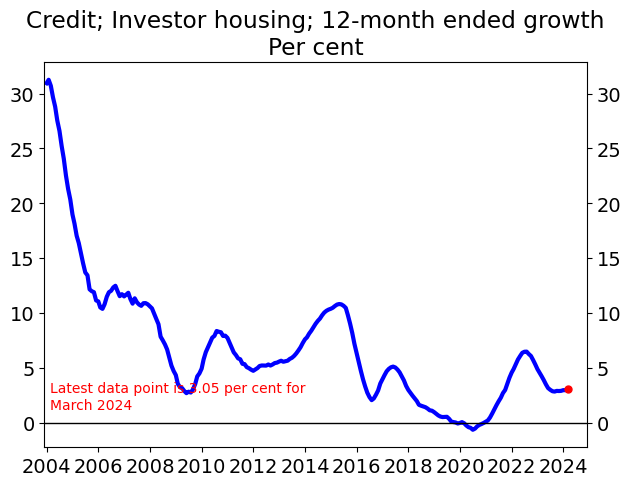

In [42]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Investor housing; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)

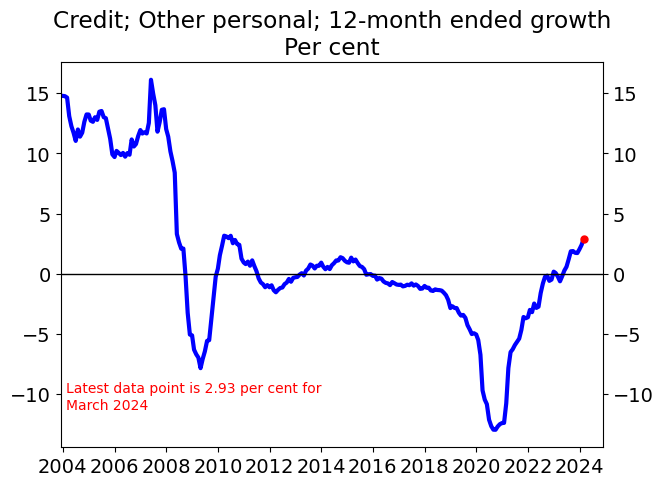

In [43]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Other personal; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample,1)